In [1]:
import numpy as np
import cv2
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Data Preprocessing Function



Validation Accuracy: 0.9210526315789473
Validation Classification Report:
              precision    recall  f1-score   support

         ASD       0.88      0.94      0.91        31
     Non-ASD       0.95      0.91      0.93        45

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76

Validation Confusion Matrix:
[[29  2]
 [ 4 41]]
Test Accuracy: 0.9342105263157895
Test Classification Report:
              precision    recall  f1-score   support

         ASD       0.91      0.98      0.95        44
     Non-ASD       0.97      0.88      0.92        32

    accuracy                           0.93        76
   macro avg       0.94      0.93      0.93        76
weighted avg       0.94      0.93      0.93        76

Test Confusion Matrix:
[[43  1]
 [ 4 28]]


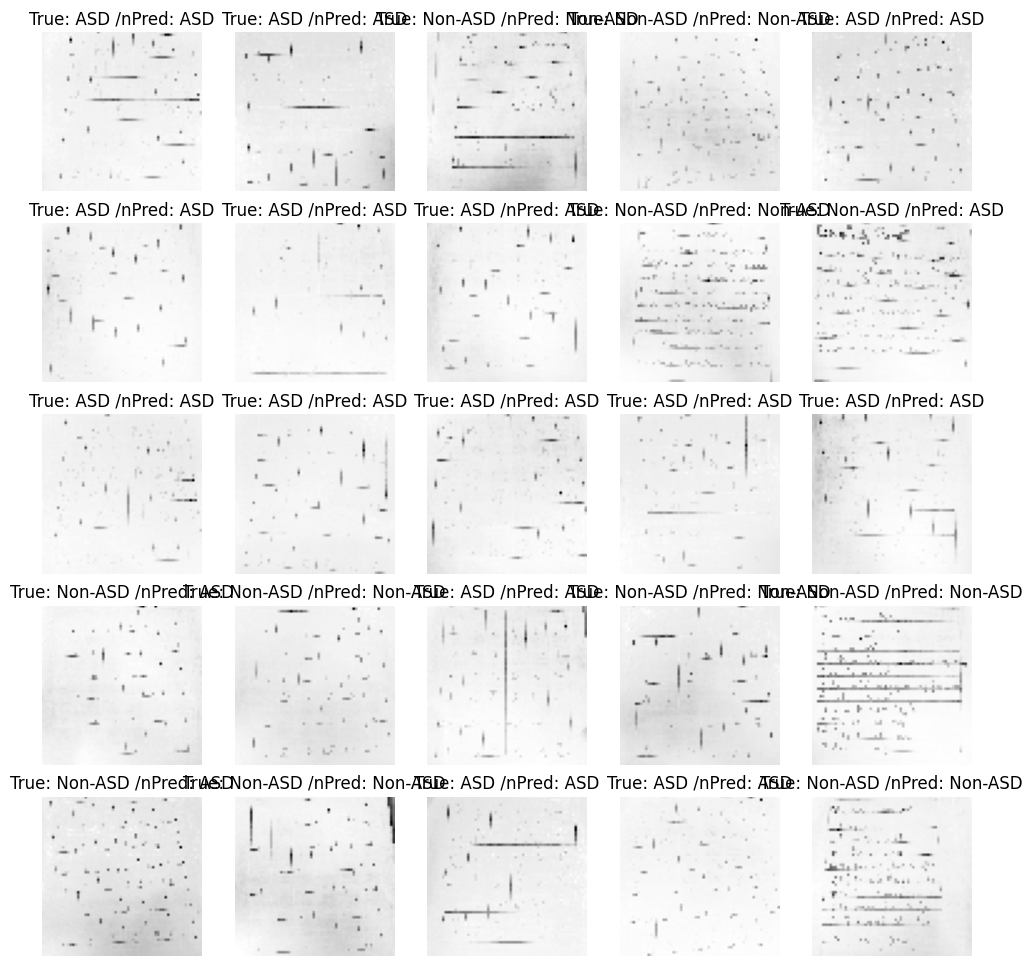

[ WARN:0@55.911] global loadsave.cpp:241 findDecoder imread_('C:/Users/vicky/Downloads/hand.jpg'): can't open/read file: check file path/integrity


In [2]:
def load_and_preprocess_images(directory, target_size=(64, 64)):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for image_name in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, target_size)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                image = image / 255.0  # Normalize
                images.append(image.flatten())
                labels.append(label)
    return np.array(images), np.array(labels)

# Define directory
data_dir = 'Thesis Dataset'

# Load and preprocess images
X, y = load_and_preprocess_images(data_dir)

# Split the dataset into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = model.predict(X_valid)
y_pred_test = model.predict(X_test)

# Evaluate the model on validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
report_valid = classification_report(y_valid, y_pred_valid)
conf_matrix_valid = confusion_matrix(y_valid, y_pred_valid)

print(f'Validation Accuracy: {accuracy_valid}')
print('Validation Classification Report:')
print(report_valid)
print('Validation Confusion Matrix:')
print(conf_matrix_valid)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print(f'Test Accuracy: {accuracy_test}')
print('Test Classification Report:')
print(report_test)
print('Test Confusion Matrix:')
print(conf_matrix_test)

# Function to plot some example predictions
def plot_example_predictions(X, y, y_pred, num_examples=25):
    plt.figure(figsize=(12, 12))
    indices = np.random.choice(len(X), num_examples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X[idx].reshape(64, 64), cmap='gray')
        plt.title(f'True: {y[idx]} /nPred: {y_pred[idx]}')
        plt.axis('off')
    plt.show()

# Plot some example predictions
plot_example_predictions(X_valid, y_valid, y_pred_valid)

# Predict on a new image
def predict_image(model, scaler, image_path, target_size=(64, 64)):
    image = cv2.imread(image_path)
    if image is not None:
        original_image = image.copy()
        image = cv2.resize(image, target_size)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        image = image / 255.0  # Normalize
        image = image.flatten().reshape(1, -1)
        image = scaler.transform(image)
        probabilities = model.predict_proba(image)
        prediction = model.predict(image)
        
        # Plot the image with predictions
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        print(f'Predicted Class: {prediction[0]}')
        print(f'Confidence for class 0: {probabilities[0][0] * 100:.2f}%')
        print(f'Confidence for class 1: {probabilities[0][1] * 100:.2f}%')

# Example usage


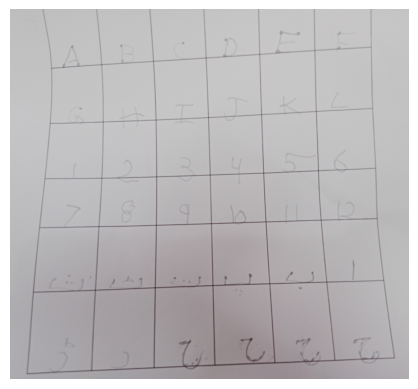

Predicted Class: ASD
Confidence for class 0: 98.93%
Confidence for class 1: 1.07%


In [3]:
predict_image(model, scaler, 'Thesis Dataset/ASD/IMG_20240401_134157.jpg')

In [4]:
import joblib
joblib.dump(model, 'writingModel.joblib')

['writingModel.joblib']